In [1]:
from shared import *
import utils.forge_purchases as forge_purchases
import utils.forge_item_types as forge_item_types
import utils.wearable_types as wearable_types
wearable_types_df = wearable_types.get_wearable_types_df()
forge_item_types_df = forge_item_types.get_forge_item_types_df(wearable_types_df)
forge_purchases_df = forge_purchases.get_forge_purchases_df()

forge_purchases_types_df = forge_purchases.get_forge_purchases_types_df(forge_purchases_df, forge_item_types_df)
get_volume_by_column = lambda column: pd.DataFrame(forge_purchases_types_df[[column, 'totalPrice']].groupby(column).sum()).rename(columns={'totalPrice': 'Total Volume (GHST)'})

## Forge Item Baazaar Sales Volume
Based on sales of forge items (alloy, schematics, cores, essence, geodes) on the Aavegotchi Baazaar during the reporting window.

In [17]:
volume_by_category = get_volume_by_column('category_name')
show_itable(volume_by_category, order=[1, 'desc'])

### Forge Item Baazaar Volume Over Time

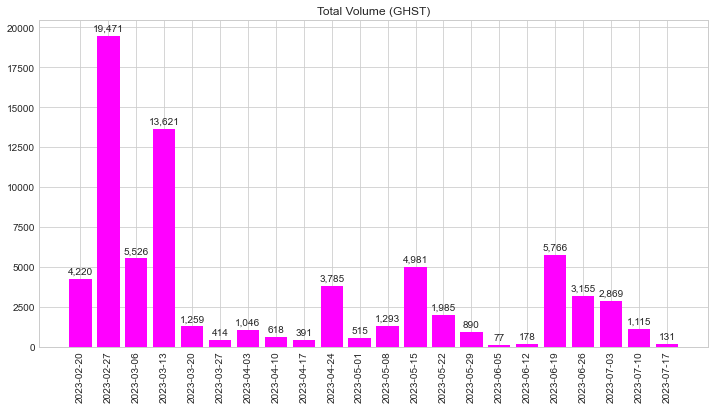

In [13]:
volume_by_week = get_volume_by_column('startOfWeekPurchased')
fig, ax = get_bar_charts(volume_by_week.reset_index(), 'startOfWeekPurchased', ['Total Volume (GHST)'], [GHST_COLOR])
ax.tick_params(axis='x', labelrotation=90)
plt.show()

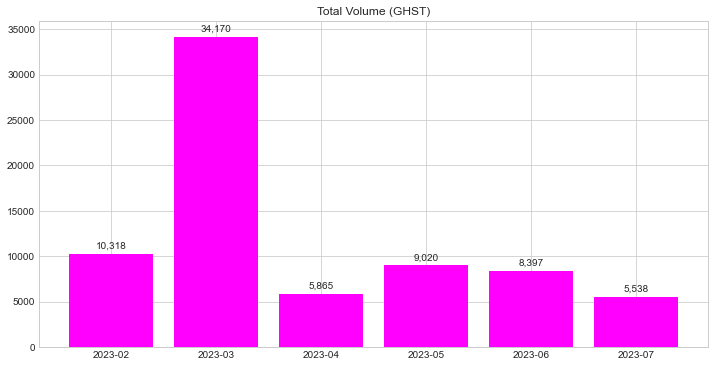

In [ ]:
volume_by_month = get_volume_by_column('yearMonthPurchased')
fig, ax = get_bar_charts(volume_by_month.reset_index(), 'yearMonthPurchased', ['Total Volume (GHST)'], [GHST_COLOR])

### Volume by Item

In [14]:
volume_by_name = get_volume_by_column('name')
volume_by_name.sort_values(by='Total Volume (GHST)', ascending=False, inplace=True)
show_itable_long(volume_by_name, order=[1, 'desc'])